<a href="https://colab.research.google.com/github/sairam-peduri/COE/blob/main/7mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def LinearRegression(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    num=0
    den=0
    n=len(x)

    for i in range(n):
        num+=(x[i]-xm)*(y[i]-ym)
        den+=(x[i]-xm)**2
    m=num/den
    c=ym-m*xm
    return m,c


x=[1,2,3,4,5]
y=[3,4,2,4,5]




m,c=LinearRegression(x,y)
print(f"y = {m}x + {c}")

y = 0.4x + 2.4


In [ ]:
def predict(x_new, m, c):
    return m * x_new + c

x_new = 6
y_p = predict(x_new, m, c)

print(f"Predicted y for x = {x_new}: {y_p}")


Predicted y for x = 6: 4.800000000000001


In [ ]:
ym=np.mean(y)
r2=1-((sum(y_p-ym)**2)/(sum(y-ym)**2))
print(f"r2 = {r2}")

TypeError: 'numpy.float64' object is not iterable

In [ ]:


def r2score(y,y_p):
    ym=np.mean(y)
    print(ym)
    num=0
    den=0
    for i in range(len(y)):
        num+=(y_p-ym)**2
        den+=(y-ym)**2
    return num/den

print(f"r2 score : ",r2score(y,y_p))


TypeError: 'numpy.float64' object is not iterable

In [ ]:
import pandas as pd
df=pd.read_csv("headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.size

948

In [ ]:
df.isna().sum()

,0
Gender,0
Age Range,0
Head Size(cm^3),0
Brain Weight(grams),0


In [ ]:
import numpy as np
def LR(x,y):
    xm=np.mean(x)
    ym=np.mean(y)
    num=0
    den=0
    n=len(x)

    for i in range(n):
        num+=(x[i]-xm)*(y[i]-ym)
        den+=(x[i]-xm)**2
    m=num/den
    c=ym-m*xm
    return m,c

In [ ]:
x=df['Head Size(cm^3)']
y=df['Brain Weight(grams)']
m,c=LR(x,y)
print(f"y = {m}x + {c}")

y = 0.26342933948939945x + 325.57342104944223


In [ ]:
def pred(x_new, m, c):
    return m * x_new + c

x_new = 6
y_p = pred(x_new, m, c)

print(f"Predicted y for x = {x_new}: {y_p}")


Predicted y for x = 6: 327.15399708637864


Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null 

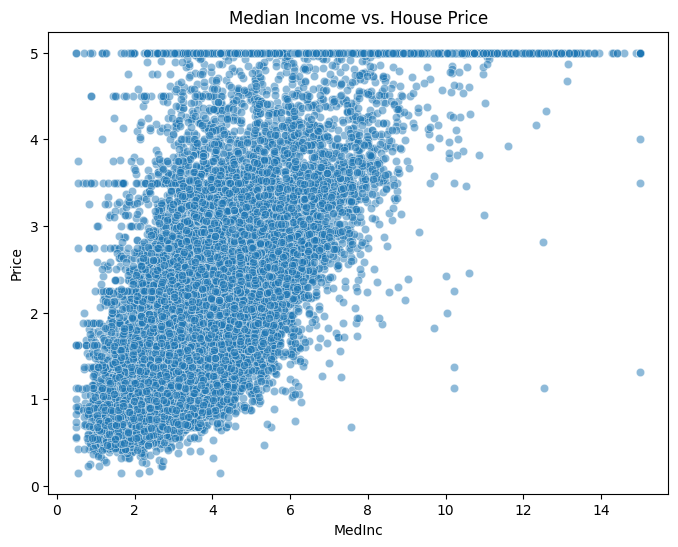

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
import seaborn as sns

#Step-1 Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print("Dataset (first 5 rows):\n",df.head())

#Step-2 EDA
print("\n Data Info:\n",df.info())
print("\nSummary Statistics:\n",df.describe())

df.isnull().sum()

plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median Income vs. House Price')
plt.show()